# Visualize NAEFS netCDF file

In [44]:
import glob
from netCDF4 import Dataset
from dateutil.parser import parse
import datetime
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#import pytz
from datetime import datetime as dt
import ncdump

import numpy as np
from scipy.optimize import curve_fit
import scipy
#from scipy.stats.distributions import  t
#import warnings
#warnings.filterwarnings(“ignore”,category=scipy.optimize.OptimizeWarning)

from mpl_toolkits.basemap import Basemap
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import matplotlib.pyplot as plt

import os
#os.getcwd()
os.environ['PROJ_LIB'] = r'/Users/ewicksteed/anaconda3/pkgs/proj4-5.2.0-h6de7cb9_1006/share/proj'


import matplotlib
cmap=matplotlib.cm.get_cmap('viridis')

In [45]:
file = 'cmc_gec00.t00z.pgrb2f012_BC.nc'

In [46]:
with Dataset(file) as input:
    ncdump.ncdump(input)

NetCDF Global Attributes:
	Conventions: 'COARDS'
	History: 'created by wgrib2'
	GRIB2_grid_template: 0
NetCDF dimension information:
	Name: latitude
		size: 361
		type: dtype('float64')
		units: 'degrees_north'
		long_name: 'latitude'
	Name: longitude
		size: 720
		type: dtype('float64')
		units: 'degrees_east'
		long_name: 'longitude'
	Name: time
		size: 1
		type: dtype('float64')
		units: 'seconds since 1970-01-01 00:00:00.0 0:00'
		long_name: 'verification time generated by wgrib2 function verftime()'
		reference_time: 1572307200.0
		reference_time_type: 3
		reference_date: '2019.10.29 00:00:00 UTC'
		reference_time_description: 'forecast or accumulated, reference date is fixed'
		time_step_setting: 'auto'
		time_step: 0.0
NetCDF variable information for group root:
	Name: APCP_surface
		dimensions: ('time', 'latitude', 'longitude')
		size: 259920
		type: dtype('float32')
		_FillValue: 9.999e+20
		short_name: 'APCP_surface'
		long_name: 'Total Precipitation'
		level: 'surface'
		uni

In [47]:
with Dataset(file,'r') as gec00:
    hgt85 = gec00.variables['HGT_850mb'][...]
    lons = gec00.variables['longitude'][...]
    lats = gec00.variables['latitude'][...]
    tmp85 = gec00.variables['TMP_850mb'][...]
    tmp85_units = gec00.variables['TMP_850mb'].units


In [48]:
# #hgt85.shape
# tmp85.shape
# #lon.shape



In [49]:
# tmp85[:,1,1]

In [50]:
# plt.imshow(np.squeeze(tmp85))

## Cartopy test

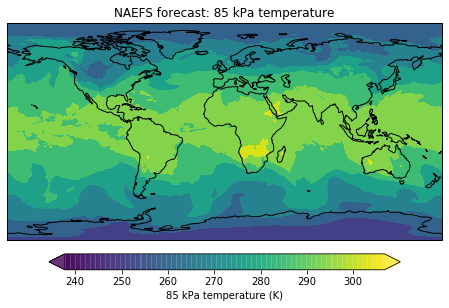

In [51]:
# import matplotlib
# cmap=matplotlib.cm.get_cmap('viridis')

proj = crs.PlateCarree()
#proj = crs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)


#plt.figure(figsize=(6, 3))
fig, ax = plt.subplots(1, 1, figsize=(9,5))
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()

ax.contourf(lons, lats, np.squeeze(tmp85)) #, transform=data_crs)

#cs=ax.pcolormesh(lons,lats,np.squeeze(tmp85),cmap=cmap,transform=proj,alpha=0.8);

cs=ax.imshow(np.squeeze(tmp85),origin='upper',cmap=cmap,
         transform=proj,alpha=0.8);

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7);
out=fig.colorbar(cs,cax=cax,extend='both',**kw);
label=out.set_label('85 kPa temperature (K)',size=10);
ax.set_title('NAEFS forecast: 85 kPa temperature');



-123.1207 49.2827


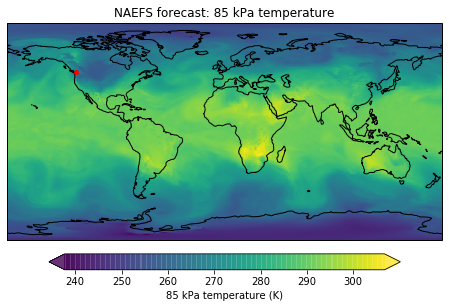

In [72]:
proj = crs.PlateCarree()
#proj = crs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)


#plt.figure(figsize=(6, 3))
fig, ax = plt.subplots(1, 1, figsize=(9,5))
ax = plt.axes(projection=proj)
ax.set_global()
ax.coastlines()

ax.contourf(lons, lats, np.squeeze(tmp85)) #, transform=data_crs)

cs=ax.pcolormesh(lons,lats,np.squeeze(tmp85),cmap=cmap,transform=proj,alpha=0.8);

#cs=ax.imshow(np.squeeze(tmp85),origin='upper',cmap=cmap,transform=proj,alpha=0.8);

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7);
out=fig.colorbar(cs,cax=cax,extend='both',**kw);
label=out.set_label('85 kPa temperature (K)',size=10);
ax.set_title('NAEFS forecast: 85 kPa temperature');



van_lon,van_lat = [-123.1207,49.2827]
van_x,van_y=proj.transform_point(van_lon,van_lat,proj)
print(van_x, van_y)

ax.plot(van_x,van_y,'ro',markersize=4);





## See NAEFS temp profiles for Vancouver

In [82]:
# get temps at different heights:
timestep = 0

# For a certain lat and lon
choose_lat = 49
choose_lon = -123  # If data is in eastings and westings
#choose_lon = 360 - 123 # if data is in only eastings



with Dataset(file,'r') as gec00:
#     hgt85 = gec00.variables['HGT_850mb'][0,...]
    lon = gec00.variables['longitude'][...]
    lat = gec00.variables['latitude'][...]
    tmp1000 = gec00.variables['TMP_1000mb'][timestep,...]
    tmp925 = gec00.variables['TMP_925mb'][timestep,...]
    tmp850 = gec00.variables['TMP_850mb'][timestep,...]
    tmp700 = gec00.variables['TMP_700mb'][timestep,...]
    tmp500 = gec00.variables['TMP_500mb'][timestep,...]
    tmp250 = gec00.variables['TMP_250mb'][timestep,...]
    tmp200 = gec00.variables['TMP_200mb'][timestep,...]
    tmp100 = gec00.variables['TMP_100mb'][timestep,...]
    tmp50 = gec00.variables['TMP_50mb'][timestep,...]
    tmp_units = gec00.variables['TMP_850mb'].units


# convert from all eastings to eastings and westings:
lon_ew = lon.copy()
lon_ew[lon_ew > 180] = lon_ew[lon_ew > 180]-360

# need to get index where lat = choose_lat and where lon = choose_lon
which_lon = lon_ew # if initially just eastings
#which_lon = lon # or lon if eastings and westings

lat_ind = np.where(lat == choose_lat)
lon_ind = np.where(which_lon == choose_lon)

print(lat_ind, lon_ind)




(array([278]),) (array([474]),)


In [94]:
levs = np.array([1000, 925, 850, 700, 500, 250, 200, 100, 50])
varbls = ['tmp', 'rh']
#print(levs)

# var_array = np.zeros_like(levs)
# #print(var_array.shape)

for var in varbls:
    #var_ar_name = var+'_array'
    #print(var_ar_name)
    for lev in levs:
        print(str(lev))
        var_ar = np.array([var+str(lev)])

        
        #     #var_array[lev] = 

    
# var= 'tmp'
# 

# print(var_array)

1000
tmp_array
925
tmp_array
850
tmp_array
700
tmp_array
500
tmp_array
250
tmp_array
200
tmp_array
100
tmp_array
50
tmp_array
1000
rh_array
925
rh_array
850
rh_array
700
rh_array
500
rh_array
250
rh_array
200
rh_array
100
rh_array
50
rh_array


In [85]:
levs.shape


(9,)